<div style="display: flex; align-items: center;">
    <img src="https://github.com/nagelt/Teaching_Scripts/raw/9d9e29ecca4b04eaf7397938eacbf116d37ddc93/Images/TUBAF_Logo_blau.png"
         width="500" height="auto" style="margin-right: 100px;" />
    <div>
        <p><strong>Prof. Dr. Thomas Nagel</strong></p>
        <p>
            Chair of Soil Mechanics and Foundation Engineering<br>
            Geotechnical Institute<br>
            Technische Universität Bergakademie Freiberg.
        </p>
        <p>
            <a href="https://tu-freiberg.de/en/soilmechanics">
                https://tu-freiberg.de/en/soilmechanics
            </a>
        </p>
    </div>
</div>

<div style="display: flex; align-items: center;">
    <p style="margin-top: 1em;">
        To activate the <strong>interactive features</strong> when in nbviewer mode, click on &quot;Execute on Binder&quot;
        <img src="https://mybinder.org/static/favicon.ico"
             alt="Binder"
             style="height: 1.1em; vertical-align: middle; margin: 0 6px;">
        on the top right. Then, click on Run → Run All Cells.
    </p>
</div>


# Gedanken zur Rechengenauigkeit

Die folgenden Ausarbeitungen sind Kapitel 1.3 an Wolfgang Fellins Buch "Geotechnik - Lernen mit Beispielen", erschienen im Logos Verlag Berlin, angelehnt. Die dortige Darstellung ist sehr illustrativ und wird daher in weiten Teilen übernommen. Zitate sind mit [1] gekennzeichnet.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
sp.init_printing(use_latex='mathjax')

#Some plot settings
import plot_functions.plot_settings
%run plot_functions/basic_quantities_plots.ipynb

Im folgenden werden einige Gedanken dargelegt, die die häufig gestellten Fragen

- Mit wie vielen Nachkommastellen soll ein Endergebnis angegeben werden?
- Wie stark darf ich Zwischenergebnisse runden?

betreffen. In grober Anlehnung an das [GiGo Prinzip](https://de.wikipedia.org/wiki/Garbage_In,_Garbage_Out) lässt sich festhalten:

- "Das Ergebnis einer Rechnung kann nie genauer sein als die ungenaueste Eingangsgröße." [1]
- "Durch das Runden von Zwischenergebnissen wird die Genauigkeit des Endergebnisses eventuell noch geringer." [1]

Die folgenden Beispiele sollen drei Grundregeln in Bezug auf die notwendigen Kommastellen illustrieren:

<div style="background-color: rgba(0, 0, 255, 0.5); padding: 5px; max-width: fit-content;">
1. "Die Kommastellen sind nicht entscheidend, sondern die sogenannten signifikanten (richtigen) Stellen.<br>
2. Die Anzahl der signifikanten Stellen des Ergebnisses ist höchstens gleich dem Minimum der Anzahl der signifikanten Stellen der Eingangsgrößen.<br>
3. Zwischenwerte in den Berechnungen sind mit ein bis zwei Stellen mehr anzugeben, als signifikante Stellen im Endergebnis erwartet werden." [1] <br>
</div>

## Signifikante Stellen: Das Beispiel der Waage

"Wenn sich ein Mensch auf eine Waage stellt, zeigt diese zum Beispiel 86 kg an. Eine übliche Haushaltswaage misst eben nur auf Kilogramm genau. Es ist also irreführend, den Messwert als 86000 g anzuschreiben, denn es könnten auch 86499 g sein, die Anzeige der Waage macht zwischen diesen beiden Werten keinen Unterschied! Die Masse ist also nur auf 2 Stellen bekannt. Diese Stellen werden *signifikante* Stellen oder *gültige* Stellen genannt. Wenn die Wage vollflächig auf der quadratischen Fläche mit der Kantenlänge 35 cm = 0,35 m steht, ist der mittlere Druck auf die Fläche" [1]

\begin{align*}
    p &= \frac{mg}{A}
\end{align*}

Für $m = 86\,$kg ergibt sich

In [2]:
p = lambda m: print("Für m = %.3f kg ergeben sich %.5f N/m² bzw. %.1f kN/m²" %(m,m*9.81/0.35**2,m*9.81/0.35**2/1000))

In [3]:
p(86)

Für m = 86.000 kg ergeben sich 6887.02041 N/m² bzw. 6.9 kN/m²


\begin{align*}
    p &= \frac{mg}{A} = \frac{86\,\text{kg}\cdot 9.81\,\text{m}\,\text{s}^{-2}}{(0.35\,\text{m})^2} = 6887,0204\dots\,\text{N}\,\text{m}^{-2}
    \\
    &\approx 6,9\,\text{kN}\,\text{m}^{-2}
\end{align*}

Man beachte, dass das Endergebnis hier auf die zwei signifikanten Stellen gerundet wurde. Um den Effekt zu demonstrieren, berechnen wir den mittleren Druck für eine Reihe von Massen zwischen 85 und 87 kg.

In [4]:
for i in range(0,21):
    p(85+i/10)

Für m = 85.000 kg ergeben sich 6806.93878 N/m² bzw. 6.8 kN/m²
Für m = 85.100 kg ergeben sich 6814.94694 N/m² bzw. 6.8 kN/m²
Für m = 85.200 kg ergeben sich 6822.95510 N/m² bzw. 6.8 kN/m²
Für m = 85.300 kg ergeben sich 6830.96327 N/m² bzw. 6.8 kN/m²
Für m = 85.400 kg ergeben sich 6838.97143 N/m² bzw. 6.8 kN/m²
Für m = 85.500 kg ergeben sich 6846.97959 N/m² bzw. 6.8 kN/m²
Für m = 85.600 kg ergeben sich 6854.98776 N/m² bzw. 6.9 kN/m²
Für m = 85.700 kg ergeben sich 6862.99592 N/m² bzw. 6.9 kN/m²
Für m = 85.800 kg ergeben sich 6871.00408 N/m² bzw. 6.9 kN/m²
Für m = 85.900 kg ergeben sich 6879.01224 N/m² bzw. 6.9 kN/m²
Für m = 86.000 kg ergeben sich 6887.02041 N/m² bzw. 6.9 kN/m²
Für m = 86.100 kg ergeben sich 6895.02857 N/m² bzw. 6.9 kN/m²
Für m = 86.200 kg ergeben sich 6903.03673 N/m² bzw. 6.9 kN/m²
Für m = 86.300 kg ergeben sich 6911.04490 N/m² bzw. 6.9 kN/m²
Für m = 86.400 kg ergeben sich 6919.05306 N/m² bzw. 6.9 kN/m²
Für m = 86.500 kg ergeben sich 6927.06122 N/m² bzw. 6.9 kN/m²
Für m = 

Wir sehen, dass Massewerte etwa in einem 1 kg breiten Intervall um 86 kg alle denselben mittleren Druck von 6.9 kN/m² liefern.

"Daraus erkennen wir, dass das Ergebnis nur auf (gerundete) 2 Stellen genau ist, $p=6,9\,$kN/m², also dieselbe Anzahl signifikante Stellen hat, wie der Eingangswert. Die Stellen dahinter sind bedeutungslos. Das Ergebnis einer Berechnung kann also nie genauer sein als der ungenaueste Eingangswert. Dieser ungenaueste Eingangswert hat die geringste Anzahl an signifikanten Stellen in unserer Rechnung, und genau diese Anzahl können wir im Ergebnis auch erwarten und nicht mehr. Hier ist die Erdbeschleunigung $g$ auf 3 signifikante Stellen angegeben, die Masse und die Länge auf 2 Stellen. Das Ergebnis ist auf 2 Stellen genau.

Es empfiehlt sich, die Wahl der wissenschaftlichen Schreibweise, oder entsprechend angepasster Einheiten, um die Anzahl der signifikanten Stellen sichtbar zu machen, z.B. würde die Angabe von 86 kg als 86000 g das Vorhandensein von 5 signifikanten Stellen vortäuschen, besser also $8,6\cdot 10^4\,$g oder eben 86 kg schreiben. Ein weiteres Beispiel für Längen:" [1]

- 2 signifikante Stellen: $22\,\text{cm} = 0,22\,\text{m} = 2,2\cdot 10 ^{-1}\,\text{m}$
- 3 signifikante Stellen: $220\,\text{mm} = 0,220\,\text{m}^* = 2,20\cdot 10 ^{-1}\,\text{m}$

<span style="font-size: 10px;">$^*$ Tippfehler in der Originalquelle korrigiert</span>

## Zwischenergebnisse nicht zu früh runden

Um zu illustrieren, wie durch vorzeitiges Runden von Zwischenergebnissen bei einer Berechnung "Stellen verloren gehen" können, betrachten wir das Beispiel des schleifenden Schnitts zweier Geraden:

\begin{align}
    y_1 &= x \tan \alpha
    \\
    y_2 &= d + x \tan\beta
\end{align}

Aus $y_1 = y_2$ ergibt sich die Lage des Schnittpunktes auf der Abszisse zu

$$
    x_\text{s} = \frac{d}{\tan\alpha - \tan\beta}
$$

"Der Schnitt ist schleifend, wenn $\alpha \approx \beta$. In diesem Fall wirkt sich eine kleine Änderung eines der beiden Winkel stark auf $x_\text{s}$ aus. Wir wollen hier den Fall $d=2$, $\beta = 30^\circ$ und $\alpha = 30,\bar{1}^\circ$ untersuchen." [1]

In [5]:
x_s = lambda alpha: 2/(np.tan(np.deg2rad(alpha)) - np.tan(np.deg2rad(30)))

In [6]:
x_s(30+1/9)

np.float64(772.6260283951924)

"Die exakte Lösung ist

$$
    x_\text{s} = \frac{2}{\tan \left(30 + \frac{1}{9}\right)^\circ - \tan 30^\circ} \approx 772,626
$$

hier auf 6 signifikante Stellen angegeben. Was passiert, wenn wir $\alpha$ auf 6 signifikante Stellen runden?" [1]

In [7]:
x_s(30.1111)

np.float64(772.7033855302165)

Das Ergebnis

$$
    x_\text{s} = \frac{2}{\tan 30,1111^\circ - \tan 30,0000^\circ} \approx 772,703.
$$

stimmt nur in den 3 führenden Ziffern 772 mit der vorherigen, auf 6 Stellen genauen, Lösung überein. Dies entspricht einem Genauigkeitsverlust von 3 Stellen! Schauen wir uns den Effekt der Rundung etwas genauer an:

In [8]:
for i in range(6,0,-1):
    alpha = round(30+1/9,i)
    print("Alpha mit %i" %(i+2) + 
          " signifikanten Stellen " + 
          "{:.{}f}°".format(alpha, int(i)).ljust(10) + 
          " ergibt einen Schnittpunkt bei %.6f" %x_s(alpha) + 
          ". Die Abweichung vom exakten Ergebnis beträgt etwa %.4f Prozent." %((x_s(alpha) - x_s(30+1/9))/x_s(30+1/9)*100))

Alpha mit 8 signifikanten Stellen 30.111111° ergibt einen Schnittpunkt bei 772.626802. Die Abweichung vom exakten Ergebnis beträgt etwa 0.0001 Prozent.
Alpha mit 7 signifikanten Stellen 30.11111°  ergibt einen Schnittpunkt bei 772.633763. Die Abweichung vom exakten Ergebnis beträgt etwa 0.0010 Prozent.
Alpha mit 6 signifikanten Stellen 30.1111°   ergibt einen Schnittpunkt bei 772.703386. Die Abweichung vom exakten Ergebnis beträgt etwa 0.0100 Prozent.
Alpha mit 5 signifikanten Stellen 30.111°    ergibt einen Schnittpunkt bei 773.400297. Die Abweichung vom exakten Ergebnis beträgt etwa 0.1002 Prozent.
Alpha mit 4 signifikanten Stellen 30.11°     ergibt einen Schnittpunkt bei 780.439099. Die Abweichung vom exakten Ergebnis beträgt etwa 1.0112 Prozent.
Alpha mit 3 signifikanten Stellen 30.1°      ergibt einen Schnittpunkt bei 858.569795. Die Abweichung vom exakten Ergebnis beträgt etwa 11.1236 Prozent.


Wir beobachten, dass mit jeder weiteren Rundung Genauigkeit verlorengeht. Anders gesagt, entspricht die Genauigkeit des Ergebnisses nicht den Erwartungen: Die auf 4 signifikante Stellen gerundete Eingabe ist nur noch auf eine Stelle richtig; die auf 3 signifikante Stellen gerundete Eingabe weist keine einzige richtige Stelle mehr auf.

Würden wir auf 2 signifikante Stellen runden, würden wir mit $\alpha = \beta$ in die Berechnung gehen, was zu einem verschwindenden Nenner führt und somit zu $x_\text{s} = \infty$.

Wir wollen das Problem der Schnittpunktverlagerung nun noch graphisch veranschaulichen.

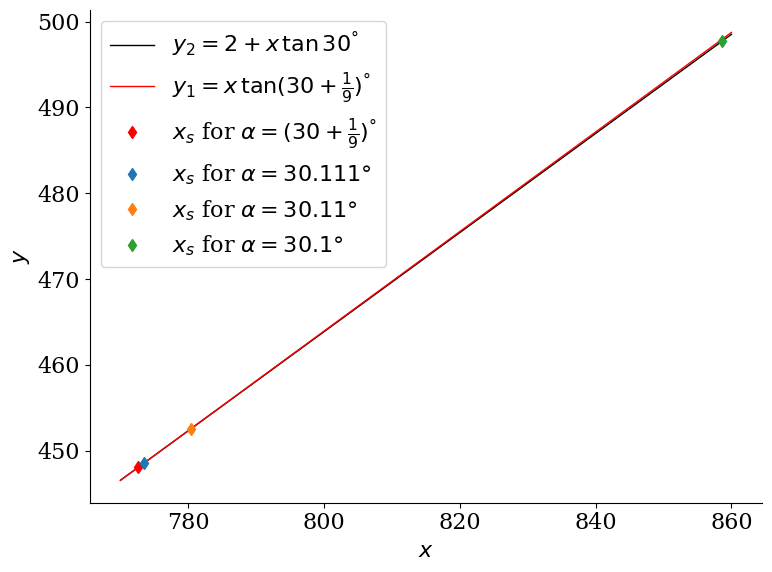

In [9]:
x = np.linspace(770,860,10)
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x,np.tan(np.deg2rad(30))*x+2,label=r'$y_2 = 2 + x\, \tan 30^°$',lw=1,color='black')
ax.plot(x,np.tan(np.deg2rad(30+1/9))*x,label=r'$y_1 = x\, \tan (30+\frac{1}{9})^°$',lw=1,color='red')
ax.plot(x_s(30+1/9),np.tan(np.deg2rad(30+1/9))*x_s(30+1/9),marker='d',color='red',label=r'$x_s$ for $\alpha = (30+\frac{1}{9})^°$',ls='')
for i in range(3,0,-1):
    alpha = round(30+1/9,i)
    label_str = r'$x_s$ for $\alpha = {:.{}f}°$'.format(alpha, int(i))
    #ax.plot(x,np.tan(np.deg2rad(alpha))*x,color='yellow', lw=1)
    ax.plot(x_s(alpha),np.tan(np.deg2rad(alpha))*x_s(alpha),label=label_str,marker='d',ls='')
ax.legend()
ax.set_ylabel(r'$y$')
ax.set_xlabel(r'$x$')
fig.tight_layout();

Beide Geraden sind aufgrund des schleifenden Schnitts visuell kaum zu unterscheiden. Die Abweichungen des Schnittpunkts aufgrund der Genauigkeitsreduktion der Winkelangabe sind deutlich erkennbar.

"Probleme dieser Art heißen schlecht konditioniert, d.h. eine kleine Änderung der Eingangsgröße ergibt eine große Änderung des Ergebnisses. Wenn wir in unsere Handrechnung Zwischenberechnungen solcher Art ausführen, müssen wir für Zwischenergebnisse mehr signifikante Stellen anschreiben als für das Endergebnis notwendig. Wie viel genau, hängt vom jeweiligen Berechnungsschritt ab. Es kann keine allgemeine Regel angegeben werden! Aber wenn wir davon ausgehen, dass unsere Berechnungen nicht extrem schlecht konditioniert sind, dann genügt es in der Regel, bei Zwischenergebnissen ein bis zwei Stellen mehr als die gegebenen signifikanten Stellen der Eingabewerte anzuschreiben. So sind z.B. Wichten typischerweise mit 3 signifikanten Stellen gegeben, z.B. $\gamma_\text{d} = 17,6\,$kN/m³. Die daraus für Zwischenrechnungen ermittelte Porenzahl sollte damit auf mindestens 4 Stellen angeschrieben werden, z.B. $e=\frac{\gamma_\text{s}}{\gamma_\text{d}} - 1 = \frac{26,0}{17,6} - 1 = 0,4773^*$. Ist $e$ ein Endergebnis, darf allerdings maximal die Anzahl der signifikanten Stellen des Eingabewertes angegeben werden, also hier $e = 0,477$." [1]

Bei Verwendung eines modernen Taschenrechners oder Computers zur Unterstützung der "Handrechnung" gilt schlichtweg der praktische Hinweis, dass Zwischenergebnisse praktischerweise mit der jeweiligen Rechengenauigkeit, d.h. ohne weiteres Runden, zwischengespeichert werden können. Die gesuchten Ergebnisse sind dann auf die signifikanten Stellen zu runden.

<span style="font-size: 10px;">$^*$ Tippfehler in der Originalquelle korrigiert</span>

## Konditionszahlen

Um herauszufinden, ob ein Problem schlecht konditioniert ist, können wir uns der aus der Physik bekannten Methoden der Fehlerrechnung bedienen. Diese beruht auf einer nach dem ersten Glied abgeschnittenen Taylorreihe. Diese sog. Linearisierung einer Funktion werden wir zukünftig in den unterschiedlichsten Zusammenhängen anwenden. Doch zurück zu unserem Problem. Gegeben sei eine im Allgemeinen nichtlineare Funktion $y=f(x)$, für die wir näherungsweise schreiben können:

$$
    y + \Delta y = f(x+\Delta x) \approx f(x) + f'(x) \Delta x
$$

Die Ableitung $f'(x)$ entspricht dem Anstieg der Funktion $f(x)$ an der Stelle $x$. "Die Ableitung $f'(x)$ stellt graphisch eine Tangente an die Funktion $f(x)$ dar, und $f'(x)\Delta x$ bedeutet, ein Stück weit dieser Tangente zu folgen, statt auf der gekrümmten Funktion zu bleiben. Eine Änderung des Eingabewertes $x$ um $\Delta x$ bewirkt die Änderung

$$
    \Delta y = f'(x) \Delta x
$$

Im Ergebnis $y$. Es spielt also die Ableitung der Funktion eine Rolle. Wenn diese an der Stelle $x$ einen großen Wert aufweist, sind numerische Probleme zu erwarten" [1]. Runden ist dann kritisch, da kleine Abweichungen $\Delta x$ durch hohe Werte der Ableitungen skaliert ("aufgeblasen") werden und zu hohen Genauigkeitsverlusten führen. 

Wir stellen nun die Ableitung der Funktion zur Bestimmung von $x_\text{s}$ einmal graphisch dar:

In [10]:
a, b, d, x = sp.symbols('alpha beta d x')

In [11]:
f = d/(sp.tan(a) - sp.tan(b))
f

       d       
───────────────
tan(α) - tan(β)

In [12]:
df_dx = f.diff(a)
df_dx.simplify()

           -d             
──────────────────────────
                 2    2   
(tan(α) - tan(β)) ⋅cos (α)

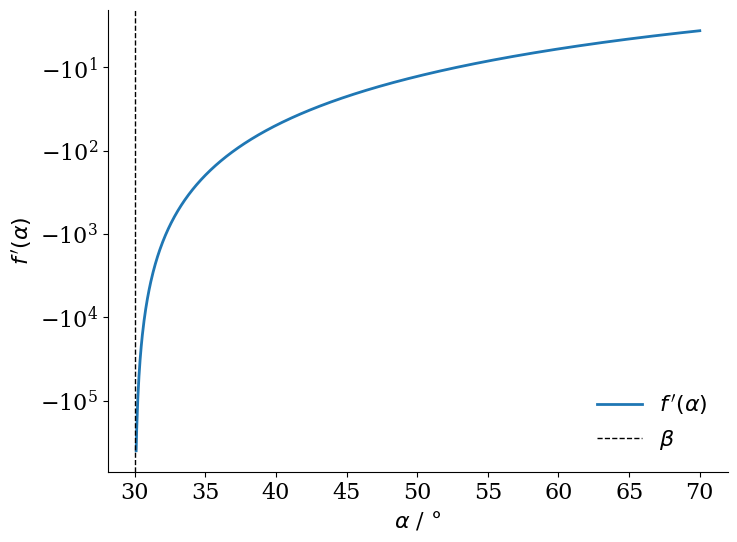

In [21]:
alpha = np.linspace(30+1/9,70,1000)
alphas = np.deg2rad(alpha)
plt.plot(alpha,-2/((np.tan(alphas)-np.tan(np.deg2rad(30)))**2 * np.cos(alphas)**2),label=r"$f\,'(\alpha)$")
plt.yscale('symlog',linthresh=0.01)
plt.xlabel(r"$\alpha$ / °")
plt.ylabel(r"$f\,'(\alpha)$")
plt.axvline(30,ls='--',lw=1,label=r'$\beta$')
plt.legend(frameon=False);

Es wird deutlich, dass der Betrag der Ableitung mit $\alpha \rightarrow \beta$ rasant ansteigt. Kleine Abweichungen in $\alpha$ wirken sich also sehr stark auf die Abschätzung des Schnittpunktes $x_\text{s}$ aus.

Die relative Änderung der Lösung kann als

$$
    \frac{\Delta y}{y} = \frac{f'(x)\Delta x}{f(x)} = \frac{x f'(x)}{f(x)} \frac{\Delta x}{x}
$$

geschrieben werden. "Der Faktor 

$$
    \left| \frac{x f'(x)}{f(x)} \right|
$$

heißt Konditionszahl des Problems an der Stelle $x$." [1]
Je höher diese Ausfällt, umso schlechter ist das Problem gestellt (konditioniert).

Wir stellen nun die Konditionszahl graphisch dar:

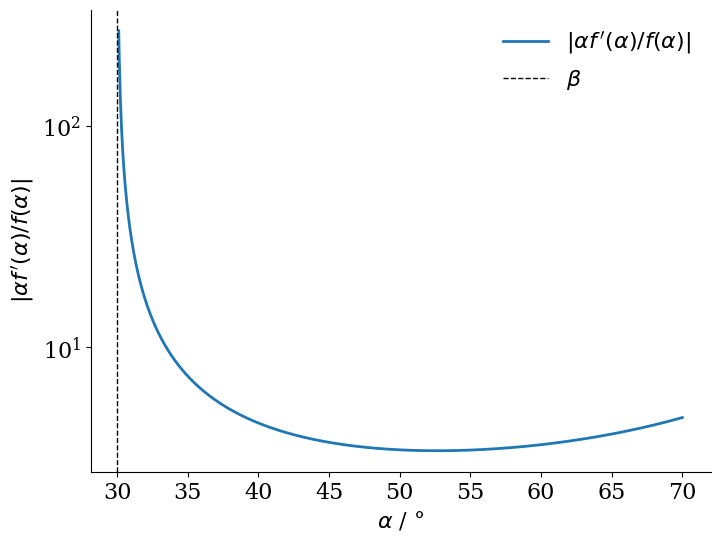

In [23]:
alpha = np.linspace(30+1/9,70,1000)
alphas = np.deg2rad(alpha)
plt.plot(alpha,np.abs(-2*alphas/((np.tan(alphas)-np.tan(np.deg2rad(30)))**2 * np.cos(alphas)**2) / 
                      (2/(np.tan(alphas) - np.tan(np.deg2rad(30))))),label=r"$|\alpha f\,'(\alpha) / f(\alpha) |$")
plt.yscale('symlog',linthresh=0.01)
plt.xlabel(r"$\alpha$ / °")
plt.ylabel(r"$|\alpha f\,'(\alpha) / f(\alpha) |$")
plt.axvline(30,ls='--',lw=1,label=r'$\beta$')
plt.legend(frameon=False);

Es ergibt sich eine Konditionszahl von 271 für den schleifenden Schnitt mit $\alpha = 30,\bar{1}^\circ$, und von 4.8 für das besser gestellte Problem bei $\alpha = 70^\circ$. Der Anstieg der Konditionszahl für höhere Winkel hängt mit dem Verhalten der Tangensfunktion bei der Annäherung an 90° zusammen.